In [2]:
# Assignment 2
import numpy as np
import matplotlib.pyplot as plt

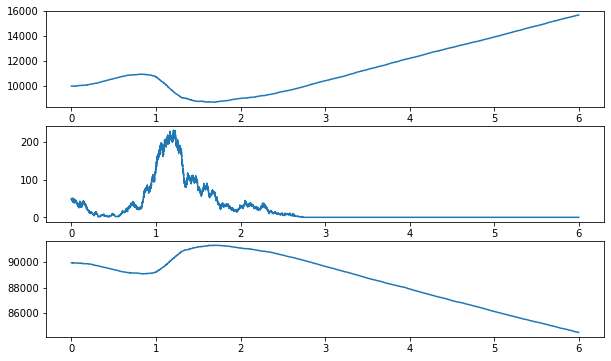

[[3671574.26889146  -61486.82308007]
 [ -61486.82308007    4931.40464492]]


In [5]:
b=1.0
g=1/10.0
m=5.5e-5
N=100_000.0
t_start=0.0
t_final=6*365.0
X0=0.1*N
Y0=0.0005*N
Z0=N-X0-Y0
R=np.zeros((6,1))
E=np.zeros((6,3),dtype=int)

E[0,:]=[1,0,0]
E[1,:]=[-1,1,0]
E[2,:]=[0,-1,1]
E[3,:]=[-1,0,0]
E[4,:]=[0,-1,0]
E[5,:]=[0,0,-1]

def GDA():
    T=[t_start]
    X=[X0]
    Y=[Y0]
    Z=[Z0]

    while T[-1]<t_final:

        res,dt=choose_event(X[-1],Y[-1],Z[-1])
        X.append(res[0])
        Y.append(res[1])
        Z.append(res[2])
        T.append(T[-1]+dt)

    return X,Y,Z,T


def choose_event(x,y,z):
    R[0]=m*N 
    R[1]=b*x*y/N 
    R[2]=g*y 
    R[3]=m*x 
    R[4]=m*y 
    R[5]=m*z
    R_tot=np.sum(R)
# different result each time. make it consistent with seed
    rand_1=np.random.rand()
    dt=-1/R_tot*np.log(rand_1)
    rand_2=np.random.rand()
    P=rand_2*R_tot

# does the order of events change the result due to cumsum?
    idx=min(np.where(P<=np.cumsum(R))[0])
    xyz=np.asarray((x,y,z))
    event=xyz[:]+E[idx,:]

    return  event,dt


s,i,r,time=GDA()
time=np.asarray(time)/365
fig, ax=plt.subplots(3,1,figsize=(10,6))
ax[0].plot(time,s)
ax[1].plot(time,i)
ax[2].plot(time,r)
plt.show()
print (np.cov(s,i))

<ipython-input-12-da5cfedac3ab>:50: RuntimeWarning: divide by zero encountered in double_scalars
  dt[0,i]=-1/R_tot*np.log(rand_1)


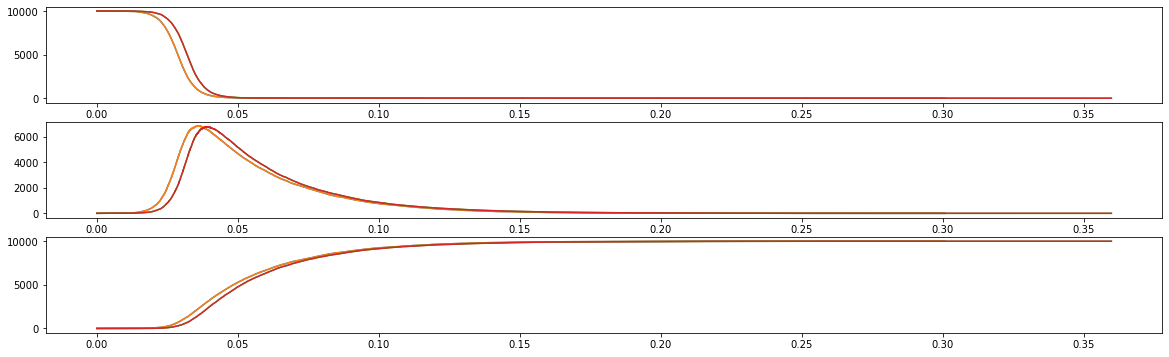

In [12]:
#subpopulations
sub_n=2
b=1.0
g=1/10.0
m=5e-4
N=10_000.0 # same for all sub_n
rho=np.full((sub_n,sub_n),0.05)
np.fill_diagonal(rho,1.0)
t_start=0.0
t_final=365.0
Y0=np.full((1,sub_n),1)
X0=np.full((1,sub_n),N-1)
Z0=np.full((1,sub_n),N-X0-Y0)



R=np.zeros((2,sub_n))
E=np.zeros((2,3))

E[0,:]=[-1,+1,0]
E[1,:]=[0,-1,+1]


def GDA():
    T=np.array([t_start]*sub_n,ndmin=2)
    X=X0
    Y=Y0
    Z=Z0

    while all(T[-1]<t_final):

        res,dt=choose_event(X[-1,:],Y[-1,:],Z[-1,:])
        X=np.append(X,[res[0,:]],axis=0)
        Y=np.append(Y,[res[1,:]],axis=0)
        Z=np.append(Z,[res[2,:]],axis=0)
        T=np.append(T,T[-1,:]+dt[:],axis=0)

    return X,Y,Z,T


def choose_event(x,y,z):
    dt=np.zeros((1,sub_n))
    event=np.zeros((3,sub_n))
    for i in range(sub_n):

        lamda=b/N*np.sum(rho[i,:]*y[:])
        R[0,i]=lamda*x[i] 
        R[1,i]=g*y[i] 
        R_tot=np.sum(R[:,i])
        rand_1=np.random.rand()
        dt[0,i]=-1/R_tot*np.log(rand_1)
        rand_2=np.random.rand()
        P=rand_2*R_tot

# does the order of events change the result due to cumsum?
        idx=min(np.where(P<=np.cumsum(R[:,i]))[0])
        xyz=np.asarray((x[i],y[i],z[i]))
        event[:,i]=xyz[:]+E[idx,:]

    return  event,dt


s,i,r,time=GDA()
time=np.asarray(time)/365
fig, ax=plt.subplots(3,1,figsize=(20,6))
for j in range(sub_n):
    ax[0].plot(time[:,j],s[:,j])
    ax[0].plot(time[:,j],s[:,j])
    ax[1].plot(time[:,j],i[:,j])
    ax[1].plot(time[:,j],i[:,j])
    ax[2].plot(time[:,j],r[:,j])
    ax[2].plot(time[:,j],r[:,j])

plt.show()




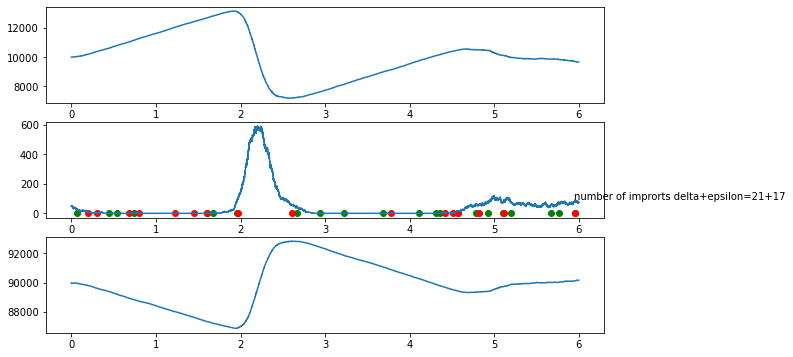

In [45]:
#imports
b=1.0
g=1/10.0
m=5.5e-5
R0=b/(g+m)
N=100_000.0
t_start=0.0
t_final=6*365.0
X0=0.1*N
Y0=0.0005*N
Z0=N-X0-Y0
delta=1.06*m*(R0-1)/np.sqrt(N)
delta=0.01
epsilon=0.0625*m*(R0-1)*np.sqrt(N)
epsilon=delta*10/N
EPSILON=[0]
DELTA=[0]
# print(X0,Y0)
R=np.zeros((8,1))
E=np.zeros((8,3),dtype=int)

E[0,:]=[1,0,0]
E[1,:]=[-1,1,0]
E[2,:]=[0,-1,1]
E[3,:]=[-1,0,0]
E[4,:]=[0,-1,0]
E[5,:]=[0,0,-1]
E[6,:]=[0,+1,0]
E[7,:]=[-1,1,0]

def GDA():
    T=[t_start]
    X=[X0]
    Y=[Y0]
    Z=[Z0]


    while T[-1]<t_final:

        res,dt,DELTA,EPSILON=choose_event(X[-1],Y[-1],Z[-1])
        X.append(res[0])
        Y.append(res[1])
        Z.append(res[2])
        T.append(T[-1]+dt)

    return X,Y,Z,T,DELTA,EPSILON


def choose_event(x,y,z):
    R[0]=m*N 
    R[1]=b*x*y/N 
    R[2]=g*y 
    R[3]=m*x 
    R[4]=m*y 
    R[5]=m*z
    R[6]=delta
    R[7]=epsilon*x
    R_tot=np.sum(R)
# different result each time. make it consistent with seed
    rand_1=np.random.rand()
    dt=-1/R_tot*np.log(rand_1)
    rand_2=np.random.rand()
    P=rand_2*R_tot

# does the order of events change the result due to cumsum?
    idx=min(np.where(P<=np.cumsum(R))[0])
    xyz=np.asarray((x,y,z))
    event=xyz[:]+E[idx,:]
    DELTA.append(1 if idx==6 else 0)
    EPSILON.append(1 if idx==7 else 0)
           

    return  event,dt,DELTA,EPSILON


s,i,r,time,imp_D,imp_E=GDA()
time=np.asarray(time)/365
fig, ax=plt.subplots(3,1,figsize=(10,6))
ax[0].plot(time,s)
ax[1].plot(time,i)

ax[1].text(time[-500],max(i)-500,f'number of improrts delta+epsilon={imp_D.count(1)}+{imp_E.count(1)}')
indexes1 = np.where(np.array(imp_D) == 1)[0]
indexes2 = np.where(np.array(imp_E) == 1)[0]
for inx1 in indexes1:
    ax[1].scatter(time[inx1],imp_D[inx1],marker='o',color='g')
for inx2 in indexes2:
    ax[1].scatter(time[inx2],imp_E[inx2],marker='o',color='r')
ax[2].plot(time,r)
plt.show()

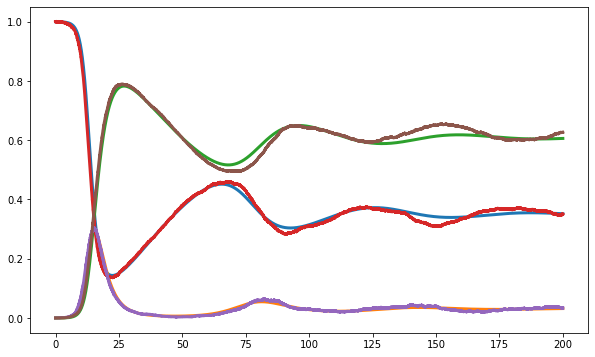

In [34]:
#resonance

# new differential equations
def fs(s,i):
    return m -b*s*i -m*s

def fi(s,i):
    return b*s*i-g*i -m*i

def fr(s,i):
    return 1-s-i -m*(1-s-i) # the same if fr=g*i-m*r

#set parameters
b=1
g=1/3
m=1/60

def rungekutta_dem(s0,i0,r0):
    
    # SIR data storage
    S=[]
    I=[]
    R=[]
    
    #initial conditions
    S.append(s0)
    I.append(i0)
    R.append(r0)
    
    # set simulation time and time step
    t0=0
    t_final=200
    steps=100_001
    time=np.linspace(t0,t_final,steps)
    N=len(time)
    h=time[1]-time[0]

    # runge-kutta coeff
    for i in range(0,N-1):

        k1=fs(S[i],I[i])
        l1=fi(S[i],I[i])

        k2=fs(S[i]+h/2*k1,I[i]+h/2*l1)
        l2=fi(S[i]+h/2*k1,I[i]+h/2*l1)

        k3=fs(S[i]+h/2*k2,I[i]+h/2*l2)
        l3=fi(S[i]+h/2*k2,I[i]+h/2*l2)

        k4=fs(S[i]+h*k3,I[i]+h*k3)
        l4=fi(S[i]+h*k3,I[i]+h*k3)

        # update values
        S.append(S[i]+h/6*(k1+2*k2+2*k3+k4))
        I.append(I[i]+h/6*(l1+2*l2+2*l3+l4))
        R.append(fr(S[-1],I[-1]))
        
    return S,I,R,time


fig, ax=plt.subplots(figsize=(10,6))
s,i,r,t=rungekutta_dem(s0=1-1e-4,i0=1e-4,r0=0)
ax.plot(t,s,t,i,t,r,linewidth=3)

N=10_000
t_start=0.0
t_final=200
X0=(1-1e-4)*N
Y0=1e-4*N
Z0=N-X0-Y0
R=np.zeros((6,1))
E=np.zeros((6,3),dtype=int)

E[0,:]=[1,0,0]
E[1,:]=[-1,1,0]
E[2,:]=[0,-1,1]
E[3,:]=[-1,0,0]
E[4,:]=[0,-1,0]
E[5,:]=[0,0,-1]

def GDA():
    T=[t_start]
    X=[X0]
    Y=[Y0]
    Z=[Z0]

    while T[-1]<t_final:

        res,dt=choose_event(X[-1],Y[-1],Z[-1])
        X.append(res[0])
        Y.append(res[1])
        Z.append(res[2])
        T.append(T[-1]+dt)

    return X,Y,Z,T


def choose_event(x,y,z):
    R[0]=m*N 
    R[1]=b*x*y/N 
    R[2]=g*y 
    R[3]=m*x 
    R[4]=m*y 
    R[5]=m*z
    R_tot=np.sum(R)
# different result each time. make it consistent with seed
    rand_1=np.random.rand()
    dt=-1/R_tot*np.log(rand_1)
    rand_2=np.random.rand()
    P=rand_2*R_tot

# does the order of events change the result due to cumsum?
    idx=min(np.where(P<=np.cumsum(R))[0])
    xyz=np.asarray((x,y,z))
    event=xyz[:]+E[idx,:]

    return  event,dt


s2,i2,r2,time2=GDA()
s2=np.asarray(s2)/N
i2=np.asarray(i2)/N
r2=np.asarray(r2)/N
time2=np.asarray(time2)
ax.plot(time2,s2,time2,i2,time2,r2,linewidth=3)
plt.show()